In [3]:
import pyspark
from pyspark.sql.functions import *
from pyspark.sql import SparkSession 
from pyspark.conf import SparkConf
from pyspark.context import SparkContext
conf = SparkConf().setAppName("DataVisualization").setMaster("local")
sc = SparkSession.builder.config("spark.driver.host", "localhost") \
.config ("spark.sql.execution.arrow.enabled", "true").getOrCreate()
#.config ("spark.sql.shuffle.partitions", "50") \
#.config("spark.driver.maxResultSize","5g") \


# Read Credit Card Info from DB to a Data Frame
df_credit=sc.read.format("jdbc").options(driver="com.mysql.cj.jdbc.Driver",\
                                     user="root",\
                                     password="lakshmi",\
                                     url="jdbc:mysql://localhost:3306/creditcard_capstone",\
                                     dbtable="creditcard_capstone.CDW_SAPP_CREDIT_CARD").load()

# Read Branch Info from DB to a Data Frame
df_branch=sc.read.format("jdbc").options(driver="com.mysql.cj.jdbc.Driver",\
                                     user="root",\
                                     password="lakshmi",\
                                     url="jdbc:mysql://localhost:3306/creditcard_capstone",\
                                     dbtable="creditcard_capstone.CDW_SAPP_BRANCH").load()

# Read Customer Info from DB to a Data Frame
df_cust=sc.read.format("jdbc").options(driver="com.mysql.cj.jdbc.Driver",\
                                     user="root",\
                                     password="lakshmi",\
                                     url="jdbc:mysql://localhost:3306/creditcard_capstone",\
                                     dbtable="creditcard_capstone.CDW_SAPP_CUSTOMER").load()


C:\Spark\python\pyspark\sql\pandas\conversion.py:114: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  PyArrow >= 1.0.0 must be installed; however, it was not found.
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warn(msg)


<AxesSubplot:ylabel='TRANSACTION_TYPE'>

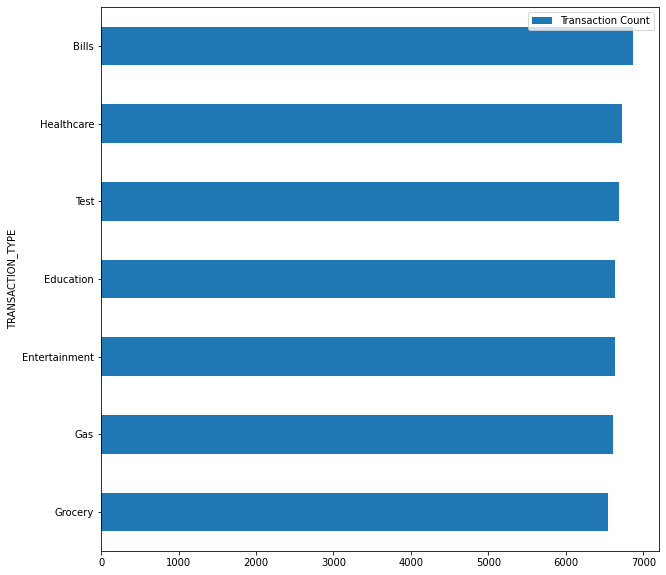

In [33]:

df_credit_pd = df_credit.groupBy('TRANSACTION_TYPE') \
        .agg(count('TRANSACTION_ID').alias('Transaction Count'), \
            (sum('TRANSACTION_VALUE')).alias('Total Transaction Value') ) \
        .sort('Transaction Count') \
        .toPandas()

df_credit_pd.plot.barh(x='TRANSACTION_TYPE', y='Transaction Count' , rot=0, figsize=(10, 10))


+----------+-------------+
|CUST_STATE|CustomerCount|
+----------+-------------+
|        NY|           96|
|        GA|           73|
|        PA|           72|
|        FL|           64|
|        IL|           58|
|        NJ|           53|
|        MD|           50|
|        CA|           45|
|        MI|           44|
|        OH|           44|
|        VA|           39|
|        NC|           37|
|        TX|           33|
|        MA|           33|
|        SC|           30|
|        WI|           29|
|        MN|           28|
|        MS|           24|
|        IA|           21|
|        KY|           17|
+----------+-------------+
only showing top 20 rows



C:\Spark\python\pyspark\sql\pandas\conversion.py:114: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  PyArrow >= 1.0.0 must be installed; however, it was not found.
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warn(msg)


<AxesSubplot:xlabel='CUST_STATE'>

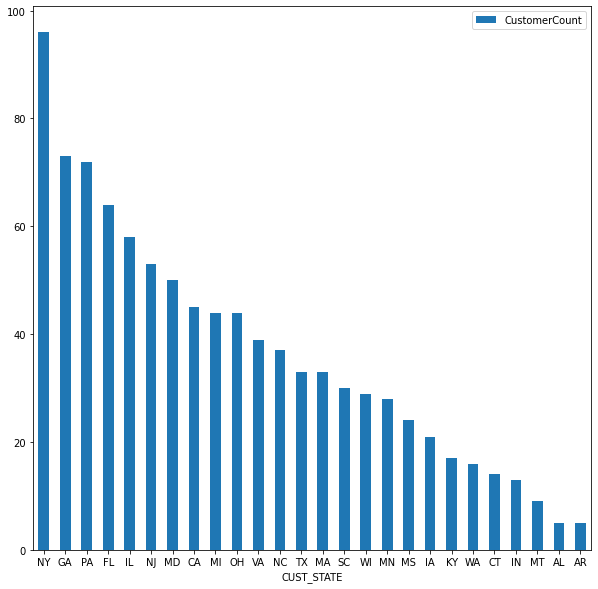

In [41]:
df_cust.groupBy('CUST_STATE') \
        .agg(count('SSN').alias('CustomerCount')) \
        .orderBy('CustomerCount', ascending=False).show()

df_cust_pd = df_cust.groupBy('CUST_STATE') \
        .agg(count('SSN').alias('CustomerCount')) \
        .orderBy('CustomerCount', ascending=False).toPandas()

df_cust_pd.plot.bar(x='CUST_STATE', y='CustomerCount' , rot=0, figsize=(10, 10) )


C:\Spark\python\pyspark\sql\pandas\conversion.py:114: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  PyArrow >= 1.0.0 must be installed; however, it was not found.
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warn(msg)


<AxesSubplot:xlabel='FIRST_NAME'>

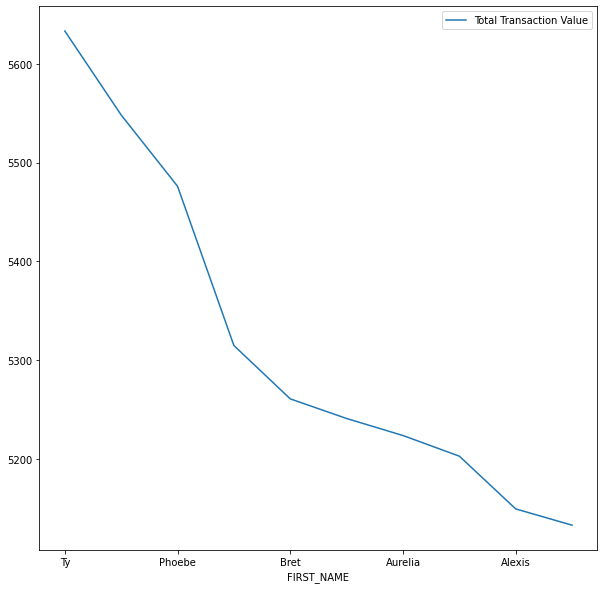

In [61]:
df_cust_credit_pd = df_credit.join(df_cust, df_credit.CUST_SSN == df_cust.SSN, 'inner'). \
    groupBy('CUST_SSN', 'FIRST_NAME') \
        .agg(sum('TRANSACTION_VALUE').alias('Total Transaction Value'))  \
        .orderBy('Total Transaction Value', ascending=False).limit(10).toPandas()

df_cust_credit_pd.plot.line(x='FIRST_NAME', y='Total Transaction Value' , rot=0, figsize=(10, 10) )    

C:\Spark\python\pyspark\sql\pandas\conversion.py:114: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  PyArrow >= 1.0.0 must be installed; however, it was not found.
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warn(msg)


<AxesSubplot:xlabel='TransactionMonth'>

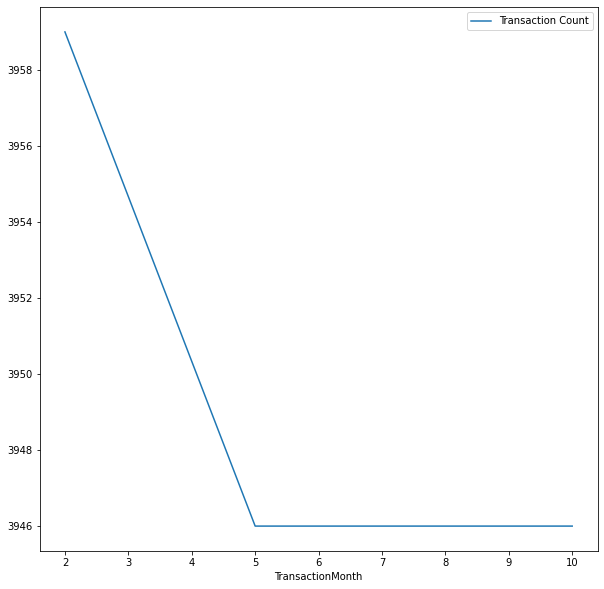

In [73]:
import pyspark.sql.functions as f
df_credit_pd_2 = df_credit.groupBy(f.month('TIMEID').alias('TransactionMonth')) \
        .agg(count('TRANSACTION_ID').alias('Transaction Count'), \
            (sum('TRANSACTION_VALUE')).alias('Total Transaction Value') ) \
        .orderBy('Transaction Count', ascending=False) \
        .limit(3).toPandas()

df_credit_pd_2.plot.line(x='TransactionMonth', y='Transaction Count' , rot=0, figsize=(10, 10) )    

C:\Spark\python\pyspark\sql\pandas\conversion.py:114: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  PyArrow >= 1.0.0 must be installed; however, it was not found.
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warn(msg)


<AxesSubplot:ylabel='BRANCH_CITY'>

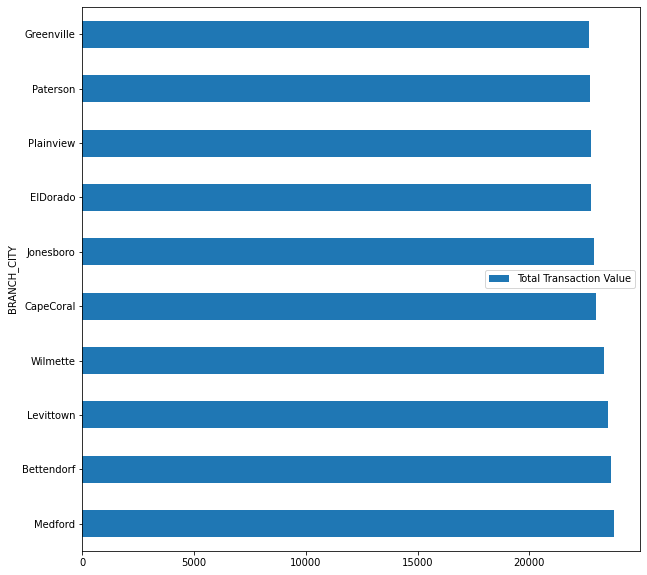

In [94]:
df_branch_credit_pd = df_credit.join(df_branch, df_credit.BRANCH_CODE == df_branch.BRANCH_CODE, 'inner') \
        .groupBy('BRANCH_CITY') \
        .agg(sum('TRANSACTION_VALUE').alias('Total Transaction Value')) \
        .orderBy('Total Transaction Value', ascending=False).limit(10) \
        .toPandas()

df_branch_credit_pd.plot.barh(x='BRANCH_CITY', y='Total Transaction Value' , rot=0, figsize=(10, 10) )    
